In [1]:
import numpy as np
import pandas as pd

# 회귀분석
from sklearn.linear_model import LinearRegression
# 훈련/검증데이터 분리
from sklearn.model_selection import train_test_split
# 다항식 생성
from sklearn.preprocessing import PolynomialFeatures
# 회귀모델 성능 측정 (설명력과 에러율)
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_squared_log_error

In [2]:
origin = pd.read_excel("https://data.hossam.kr/E04/cars.xlsx")
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [5]:
# 독립변수 다항식 생성
poly = PolynomialFeatures(include_bias=False) # 객체
fit = poly.fit_transform(origin[['speed']]) # speed에 대해 다항식 생성
x = pd.DataFrame(fit, columns=poly.get_feature_names_out())
x

,speed,speed^2
0,4.0,16.0
1,4.0,16.0
2,7.0,49.0
3,7.0,49.0
4,8.0,64.0
5,9.0,81.0
6,10.0,100.0
7,10.0,100.0
8,10.0,100.0
9,11.0,121.0


In [6]:
# 종속변수 
y = origin[['dist']]
y

,dist
0,2
1,10
2,4
3,22
4,16
5,10
6,18
7,26
8,34
9,17


In [7]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=245)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35, 2), (15, 2), (35, 1), (15, 1))

In [10]:
# 회귀분석
model = LinearRegression() #객체생성
fit = model.fit(x_train, y_train) #분석 수행

print("계수:", fit.coef_)
print("절편:", fit.intercept_)
print("훈련데이터_설명력:", fit.score(x_train, y_train))
print("검증데이터_설명력:", fit.score(x_test, y_test))

계수: [[2.66217443 0.01877458]]
절편: [-5.59048856]
훈련데이터_설명력: 0.6369324456365243
검증데이터_설명력: 0.6033674309812221


In [13]:
# 훈련데이터 예측값 생성
y_train_pred = fit.predict(x_train)
y_train_pred.squeeze()

array([32.19068386, 45.09233173, 72.69798759, 48.41161662, 48.41161662,
       55.16283391, 41.81059601, 25.96515493, 38.56640946, 45.09233173,
       22.90871422, 35.35977207, 35.35977207, 55.16283391, 29.05914481,
       35.35977207, 51.76845068, 29.05914481, 19.88982269,  5.35860252,
       51.76845068, 48.41161662, 55.16283391, 29.05914481, 13.96468711,
       45.09233173, 25.96515493, 22.90871422, 32.19068386, 29.05914481,
       55.16283391, 51.76845068, 55.16283391, 65.57127861, 62.06424788])

In [14]:
# 검증데이터 예측값 생성
y_test_pred = fit.predict(x_test)
y_test_pred.squeeze()

array([69.11585852,  5.35860252, 32.19068386, 69.11585852, 22.90871422,
       35.35977207, 41.81059601, 16.90848032, 69.11585852, 38.56640946,
       13.96468711, 32.19068386, 38.56640946, 69.11585852, 48.41161662])

In [17]:
# 회귀모델 성능평가 (설명력과 에러율)
# 설명력
# 1) fit.score()
print("훈련데이터설명력:", fit.score(x_train, y_train))
print("검증데이터설명력:", fit.score(x_test, y_test))

훈련데이터설명력: 0.6369324456365243
검증데이터설명력: 0.6033674309812221


In [20]:
# 2) r2_score() : 실제값과 예측값의 차이(=잔차)를 이용해 성능판단
print("훈련데이터설명력:", r2_score(y_train, y_train_pred))
print("검증데이터설명력:", r2_score(y_test, y_test_pred))

훈련데이터설명력: 0.6369324456365243
검증데이터설명력: 0.6033674309812221


In [21]:
# 회귀모델 성능평가 (설명력과 에러율)
# 에러율
# 1) MAE (Mean Absolute Error) : 평균절대오차
print("훈련데이터설명력:", mean_absolute_error(y_train, y_train_pred))
print("검증데이터설명력:", mean_absolute_error(y_test, y_test_pred))

훈련데이터설명력: 9.303627957215797
검증데이터설명력: 16.00879141924198


In [22]:
# 2) MSE (Mean Squared Error) : 평균제곱 오차
print("훈련데이터설명력:", mean_squared_error(y_train, y_train_pred))
print("검증데이터설명력:", mean_squared_error(y_test, y_test_pred))

훈련데이터설명력: 130.10977792672625
검증데이터설명력: 509.11051434683174


In [24]:
# 3) RMSE (Root Mean Squared Error) : 평균 오차
print("훈련데이터설명력:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("검증데이터설명력:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

훈련데이터설명력: 11.406567315661897
검증데이터설명력: 22.563477443577526


In [25]:
# 4) MAPE (Mean Absoulte Percentage Error) : 평균 절대 백분 오차 비율
print("훈련데이터설명력:", np.mean(np.abs((y_train.values - y_train_pred)/y_train.values)) * 100)
print("검증데이터설명력:", np.mean(np.abs((y_test.values - y_test_pred)/y_test.values)) * 100)

훈련데이터설명력: 31.953140481807633
검증데이터설명력: 46.379491265355334


In [29]:
# 5) MPE (Mean Percentage Error) : 평균 비율 오차
print("훈련데이터설명력:", np.mean((y_train.values - y_train_pred)/y_train.values) * 100 )
print("검증데이터설명력:", np.mean((y_test.values - y_test_pred)/y_test.values) * 100)

훈련데이터설명력: -13.990507735807734
검증데이터설명력: -13.829444505980156


******************

In [9]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn.preprocessing as skpre
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## 강낭콩

In [4]:
data = pd.read_excel("http://data.hossam.kr/E04/beans.xlsx")
df = pd.DataFrame(data)
df

,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


#### 시각화 먼저 해보기

In [6]:
# 그래프 환경 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

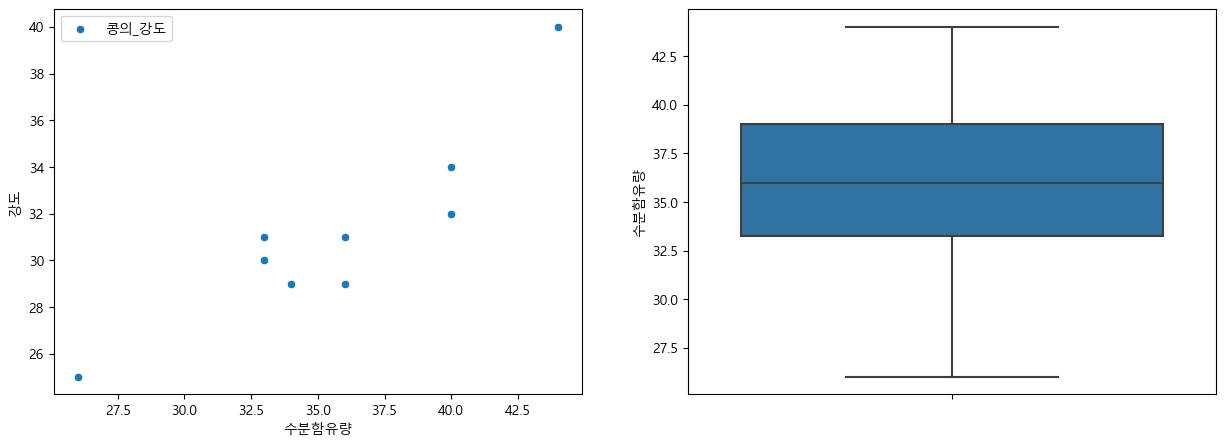

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sb.scatterplot(df, x=df['수분함유량'], y=df['강도'], label='콩의_강도', ax=ax1)
sb.boxplot(y=df['수분함유량'])

plt.show()
plt.close()

> 이상치는 존재 X

#### 데이터분리 전 degree 결정 (그래프를 먼저 보기)

In [ ]:
# 그래프를 먼저 확인해보기 => degree를 결정할 수 있음.(2차 다항식?)
poly = PolynomialFeatures()
fit = poly.fit_transform()